NIRSpecPFN RMSE: [0.17052442 0.14041258 0.10194209 0.10928405 0.17576292]
SVR RMSE: [0.17917976 0.13940724 0.11480098 0.14469466 0.25380378]

===== Bayesian Signed-Rank Test =====
P(TabPFN worse) = 0.01154
P(no practical diff) = 0.0
P(TabPFN better) = 0.98846


<Figure size 600x400 with 0 Axes>

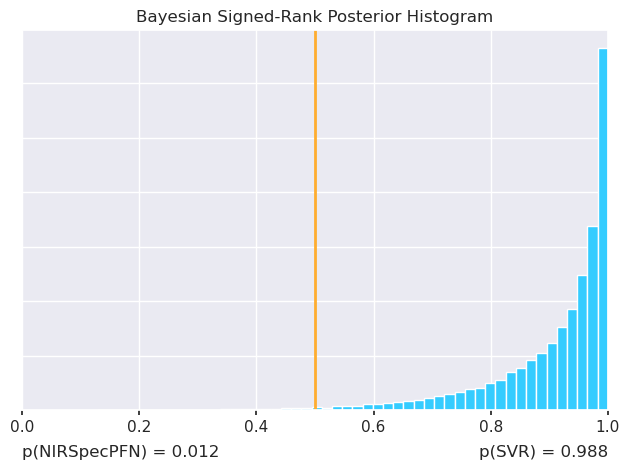

<Figure size 600x600 with 0 Axes>

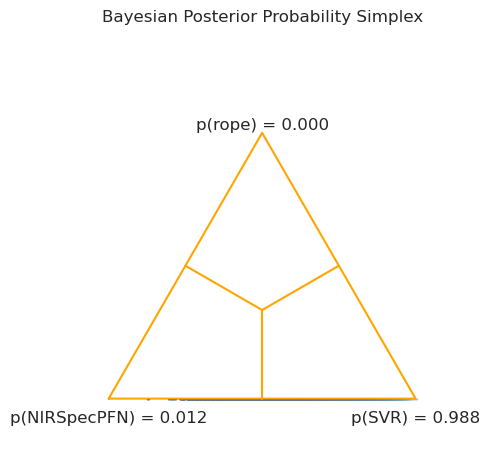

In [ ]:
import pandas as pd
import baycomp
import matplotlib.pyplot as plt

file_tabpfn = r"C:\Users\zmzhang\Desktop\RESULT\5 run\corn\TabPFN703_5runs_results.xlsx"
file_svr    = r"C:\Users\zmzhang\Desktop\RESULT\5 run\corn\PLSR703_5runs_results.xlsx"

x = pd.read_excel(file_tabpfn).iloc[0:5, 3].values   # NIRSpecPFN RMSE
y = pd.read_excel(file_svr).iloc[0:5, 3].values      # SVR RMSE

print("NIRSpecPFN RMSE:", x)
print("SVR RMSE:", y)

posterior = baycomp.SignedRankTest(x, y, rope=0.0)

p_left, p_rope, p_right = posterior.probs()
print("\n===== Bayesian Signed-Rank Test =====")
print("P(TabPFN worse) =", p_left)
print("P(no practical diff) =", p_rope)
print("P(TabPFN better) =", p_right)

names = ["NIRSpecPFN", "SVR"]  # x,y

plt.figure(figsize=(6,4))
posterior.plot_histogram(names)
plt.title("Bayesian Signed-Rank Posterior Histogram")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,6))
posterior.plot_simplex(names)
plt.title("Bayesian Posterior Probability Simplex")
plt.tight_layout()
plt.show()
